In [47]:
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import os
import hashlib
import shutil
import cv2

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import defaultdict
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [49]:
# Specify the directory path
directory_path = 'Selected/Dataset'

# Use os.walk to get the directory count
path, dirs, files = next(os.walk(directory_path))
directory_count = len(dirs)

print('Number of Directories:', directory_count)

Number of Directories: 2


In [50]:
# Specify the directory path
directory_path = 'Selected/Dataset'

# Use os.walk to get the directory names
path, dirs, files = next(os.walk(directory_path))

print('Directory names:')
for directory_name in dirs:
    print(directory_name)

Directory names:
george
no_george


In [51]:
# Specify the subdirectory path
subdirectory_path = 'Selected/Dataset/george'

# Use os.walk to get the file count in the subdirectory
path, dirs, files = next(os.walk(subdirectory_path))
george_images = len(files)

print('Number of images with St George :', george_images)

Number of images with St George : 2358


In [52]:
def get_file_checksum(filename):
    hasher = hashlib.md5()
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hasher.update(chunk)
    return hasher.hexdigest()

def find_duplicate_files(directory):
    file_hashes = defaultdict(list)
    
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)
            file_hash = get_file_checksum(full_path)
            file_hashes[file_hash].append(full_path)
    
    duplicate_groups = [files for files in file_hashes.values() if len(files) > 1]
    return duplicate_groups

directory_to_search = "Selected/Dataset/george/"
duplicate_groups = find_duplicate_files(directory_to_search)

for group in duplicate_groups:
    print("Duplicate files:")
    for file_path in group:
        print(file_path)
    print()

In [53]:
def get_file_checksum(filename):
    hasher = hashlib.md5()
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hasher.update(chunk)
    return hasher.hexdigest()

def remove_duplicate_files(directory):
    file_hashes = defaultdict(list)
    removed_count = 0
    
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)
            file_hash = get_file_checksum(full_path)
            file_hashes[file_hash].append(full_path)
    
    for files in file_hashes.values():
        if len(files) > 1:
            # Keep the first file, remove the rest
            files_to_remove = files[1:]
            for file_path in files_to_remove:
                os.remove(file_path)
                removed_count += 1
    
    return removed_count

directory_to_clean = "Selected/Dataset/george/"
removed_count = remove_duplicate_files(directory_to_clean)

print(f"Removed {removed_count} duplicate files.")

Removed 0 duplicate files.


In [54]:
file_names = os.listdir('Selected/Dataset/george')
print(file_names)

['0018b7f3006c03e479018e609629d226.jpg', '005d75fd1ab5478b0a1b3290032e9358.jpg', '007976c486543ea187dcc285f1564aca.jpg', '009e2661284808d4373a71d2f461ac86.jpg', '00a8418680f015900aa9ee6eea4c762f.jpg', '00c267a9a5895b1b04a58228f37d3116.jpg', '00e5d366808afde912ec0d6f3905890e.jpg', '00f07d4b277a6de64488cb1137347db6.jpg', '01065ddfd068eb0e5358795714c6022f.jpg', '01516a9a358b7196b18236017750faf8.jpg', '0153dbf9d4484a990b1d183825679bc9.jpg', '016cea2ced920d8f05c65b75a988b6dd.jpg', '016e4766a9f6ee3978b6318a592421e0.jpg', '0170c0b56f8e4726aba50cfd7bf22ec1.jpg', '0174ad90fad81e8632464a7403cada1f.jpg', '0187d575c4ab17cc4a72f578ee750944.jpg', '0196052669e65fb569a8415d8db526a0.jpg', '01a351d6d01d9a525a11e75e32942c68.jpg', '01cd39528965c78e119e6629adfa99f0.jpg', '01dcea291ddc7ce0fd04d17c9007198a.jpg', '01e4ea11aa55bb0e036912e8c84c478e.jpg', '01f0caa8e007d558fed12cf033fda57b.jpg', '01fa6f6ee89e05957cb30a23b17db813.jpg', '0205bc42e82109eff8654f5ed3786c58.jpg', '02154f7e75289f8eeb0d055e43f1302d.jpg',

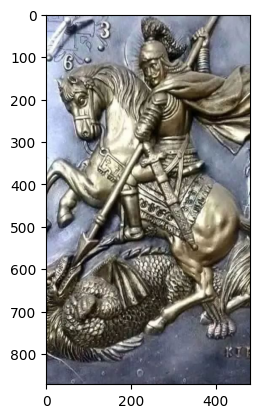

In [55]:
img1 = mpimg.imread('Selected/Dataset/george/005d75fd1ab5478b0a1b3290032e9358.jpg')
imgplt = plt.imshow(img1)
plt.show()

In [56]:
# Specify the subdirectory path
subdirectory_path = 'Selected/Dataset/no_george'

# Use os.walk to get the file count in the subdirectory
path, dirs, files = next(os.walk(subdirectory_path))
no_george_images = len(files)

print('Number of images without St George :', no_george_images)

Number of images without St George : 3339


In [57]:
def get_file_checksum(filename):
    hasher = hashlib.md5()
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hasher.update(chunk)
    return hasher.hexdigest()

def find_duplicate_files(directory):
    file_hashes = defaultdict(list)
    
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)
            file_hash = get_file_checksum(full_path)
            file_hashes[file_hash].append(full_path)
    
    duplicate_groups = [files for files in file_hashes.values() if len(files) > 1]
    return duplicate_groups

directory_to_search = "Selected/Dataset/no_george/"
duplicate_groups = find_duplicate_files(directory_to_search)

for group in duplicate_groups:
    print("Duplicate files:")
    for file_path in group:
        print(file_path)
    print()

In [58]:
def get_file_checksum(filename):
    hasher = hashlib.md5()
    with open(filename, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hasher.update(chunk)
    return hasher.hexdigest()

def remove_duplicate_files(directory):
    file_hashes = defaultdict(list)
    removed_count = 0
    
    for root, _, files in os.walk(directory):
        for filename in files:
            full_path = os.path.join(root, filename)
            file_hash = get_file_checksum(full_path)
            file_hashes[file_hash].append(full_path)
    
    for files in file_hashes.values():
        if len(files) > 1:
            # Keep the first file, remove the rest
            files_to_remove = files[1:]
            for file_path in files_to_remove:
                os.remove(file_path)
                removed_count += 1
    
    return removed_count

directory_to_clean = "Selected/Dataset/no_george/"
removed_count = remove_duplicate_files(directory_to_clean)

print(f"Removed {removed_count} duplicate files.")

Removed 0 duplicate files.


In [59]:
file_names = os.listdir('Selected/Dataset/no_george/')
print(file_names)

['001057258c93dc3fe176526d011af770.jpg', '001592ee7a76aa8116c99dd35f71b841.jpg', '001f59de2a98736af67bd6736872770f.jpg', '003d4e46a416fd1ccdc9deb20a079865.jpg', '003fd791d02173dc838c4ed68eadc0d9.jpg', '004d166b79d0ba4440927448576a5d38.jpg', '0050e33979e8db7ce559c0693d9b632b.jpg', '0067c05256b4b0c40fef191d867f4fef.jpg', '007d215f8ca4296535bfffc52a085e14.jpg', '008ee0b9f6bca98d16fe8108375e4d78.jpg', '00a16849dbc8281a38f7bfcabca8f99c.jpg', '00bb70f08e19fccddf20b4df40936c2e.jpg', '00de0a9376add24248ade9a0364b771d.jpg', '00e6fc96b14b5b27fb8f61bfb72f6943.jpg', '01073eb7b3ffc55db3efe710588eb2d0.jpg', '010f5d0264b87aefbb71dd000f7063cd.jpg', '0146cdc5cee0dfa8812bdb2a38183649.jpg', '015792479c00b4458a5d16c1347195df.jpg', '015cca4d7c43d34996f6839de045a3b8.jpg', '016bbab604ae78960e28220b06615988.jpg', '0188542e78caff82450548fd49e99dbf.jpg', '01a0785715b064b10ade9be9e32449b5.jpg', '01ac73d2f0de939f71a0cc3acd40107f.jpg', '01b4e3aa073eee26194aae64cd81d4e6.jpg', '01d9784ae7270842f92696374027b328.jpg',

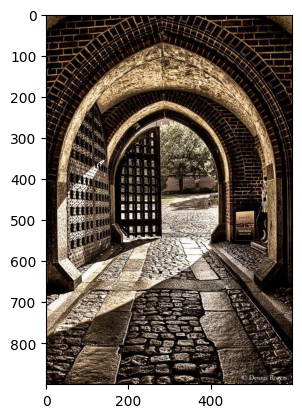

In [60]:
img1 = mpimg.imread('Selected/Dataset/no_george/001592ee7a76aa8116c99dd35f71b841.jpg')
imgplt = plt.imshow(img1)
plt.show()

In [61]:
# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:1000]

# Destination folder to transfer images
destination_folder = 'Selected/Train/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Train/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Train/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Train/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Train/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Train/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Train/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Train/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Train/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Train/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Train/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Train/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Train/george/'
Transferred '016e4766a9f6ee3978b6318a592421e0.jpg' t

In [62]:
# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Test/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Test/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Test/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Test/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Test/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Test/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Test/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Test/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Test/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Test/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Test/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Test/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Test/george/'
Transferred '016e4766a9f6ee3978b6318a592421e0.jpg' to 'Selected/

In [63]:
# Source folder containing images
source_folder = 'Selected/Dataset/george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Validation/george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '0018b7f3006c03e479018e609629d226.jpg' to 'Selected/Validation/george/'
Transferred '005d75fd1ab5478b0a1b3290032e9358.jpg' to 'Selected/Validation/george/'
Transferred '007976c486543ea187dcc285f1564aca.jpg' to 'Selected/Validation/george/'
Transferred '009e2661284808d4373a71d2f461ac86.jpg' to 'Selected/Validation/george/'
Transferred '00a8418680f015900aa9ee6eea4c762f.jpg' to 'Selected/Validation/george/'
Transferred '00c267a9a5895b1b04a58228f37d3116.jpg' to 'Selected/Validation/george/'
Transferred '00e5d366808afde912ec0d6f3905890e.jpg' to 'Selected/Validation/george/'
Transferred '00f07d4b277a6de64488cb1137347db6.jpg' to 'Selected/Validation/george/'
Transferred '01065ddfd068eb0e5358795714c6022f.jpg' to 'Selected/Validation/george/'
Transferred '01516a9a358b7196b18236017750faf8.jpg' to 'Selected/Validation/george/'
Transferred '0153dbf9d4484a990b1d183825679bc9.jpg' to 'Selected/Validation/george/'
Transferred '016cea2ced920d8f05c65b75a988b6dd.jpg' to 'Selected/Validation/g

In [64]:
# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:1000]

# Destination folder to transfer images
destination_folder = 'Selected/Train/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Train/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Train/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Train/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Train/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Train/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Train/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Train/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Train/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Train/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Train/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Train/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c2e.jpg' to 'Selected/Train/no_george/'
Transferred '00d

In [65]:
# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Test/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Test/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Test/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Test/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Test/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Test/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Test/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Test/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Test/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Test/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Test/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Test/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c2e.jpg' to 'Selected/Test/no_george/'
Transferred '00de0a9376add24

In [66]:
# Source folder containing images
source_folder = 'Selected/Dataset/no_george/'

# Get the list of all filenames in the source folder
all_filenames = os.listdir(source_folder)

# Filter the list to include only image filenames (adjust extensions as needed)
image_filenames = [filename for filename in all_filenames if filename.lower().endswith(('.jpg', '.png'))]

# Adjust the image_filenames list to contain only the first 2000 filenames
image_filenames = image_filenames[:500]

# Destination folder to transfer images
destination_folder = 'Selected/Validation/no_george/'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through the image filenames and transfer them
for filename in image_filenames:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    # Transfer the image from source to destination
    shutil.copy(source_path, destination_path)
    
    print(f"Transferred '{filename}' to '{destination_folder}'")

print("Image transfer completed for all images.")

Transferred '001057258c93dc3fe176526d011af770.jpg' to 'Selected/Validation/no_george/'
Transferred '001592ee7a76aa8116c99dd35f71b841.jpg' to 'Selected/Validation/no_george/'
Transferred '001f59de2a98736af67bd6736872770f.jpg' to 'Selected/Validation/no_george/'
Transferred '003d4e46a416fd1ccdc9deb20a079865.jpg' to 'Selected/Validation/no_george/'
Transferred '003fd791d02173dc838c4ed68eadc0d9.jpg' to 'Selected/Validation/no_george/'
Transferred '004d166b79d0ba4440927448576a5d38.jpg' to 'Selected/Validation/no_george/'
Transferred '0050e33979e8db7ce559c0693d9b632b.jpg' to 'Selected/Validation/no_george/'
Transferred '0067c05256b4b0c40fef191d867f4fef.jpg' to 'Selected/Validation/no_george/'
Transferred '007d215f8ca4296535bfffc52a085e14.jpg' to 'Selected/Validation/no_george/'
Transferred '008ee0b9f6bca98d16fe8108375e4d78.jpg' to 'Selected/Validation/no_george/'
Transferred '00a16849dbc8281a38f7bfcabca8f99c.jpg' to 'Selected/Validation/no_george/'
Transferred '00bb70f08e19fccddf20b4df40936c

In [67]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Selected/Train/',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Selected/Validation/',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [68]:
# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_datagen.flow_from_directory(
    directory='Selected/Train/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # Change this based on your label type
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(
    directory='Selected/Validation/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # Change this based on your label type
    shuffle=False
)

# Print some information about the loaded datasets
print("Training dataset:")
print("Number of samples:", train_generator.samples)
print("Number of classes:", train_generator.num_classes)
print("Class labels:", train_generator.class_indices)
print()

print("Validation dataset:")
print("Number of samples:", validation_generator.samples)
print("Number of classes:", validation_generator.num_classes)
print("Class labels:", validation_generator.class_indices)
print()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training dataset:
Number of samples: 2000
Number of classes: 2
Class labels: {'george': 0, 'no_george': 1}

Validation dataset:
Number of samples: 1000
Number of classes: 2
Class labels: {'george': 0, 'no_george': 1}



In [69]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [70]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
63/63 [==============================] - 280s 4s/step - loss: 6.6740 - accuracy: 0.5795 - val_loss: 3.6823 - val_accuracy: 0.5010
Epoch 2/10
63/63 [==============================] - 335s 5s/step - loss: 2.9736 - accuracy: 0.5965 - val_loss: 1.3350 - val_accuracy: 0.5700
Epoch 3/10
63/63 [==============================] - 324s 5s/step - loss: 1.2306 - accuracy: 0.6125 - val_loss: 1.8175 - val_accuracy: 0.5570
Epoch 4/10
63/63 [==============================] - 334s 5s/step - loss: 0.7306 - accuracy: 0.6355 - val_loss: 2.0627 - val_accuracy: 0.4760
Epoch 5/10
63/63 [==============================] - 287s 4s/step - loss: 0.6741 - accuracy: 0.6470 - val_loss: 0.8402 - val_accuracy: 0.5300
Epoch 6/10
63/63 [==============================] - 278s 4s/step - loss: 0.5990 - accuracy: 0.6705 - val_loss: 0.7301 - val_accuracy: 0.6250
Epoch 7/10
63/63 [==============================] - 287s 5s/step - loss: 0.5694 - accuracy: 0.6855 - val_loss: 0.6238 - val_accuracy: 0.6520
Epoch 8/10
63

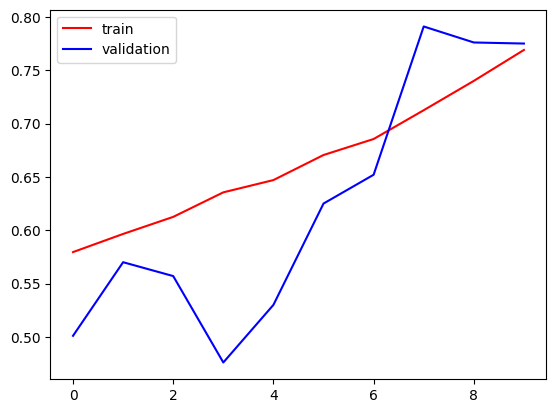

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

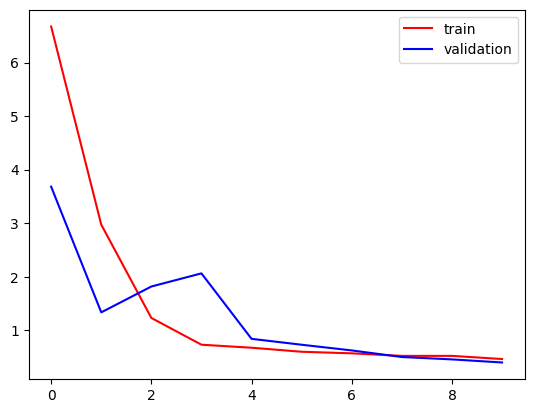

In [75]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

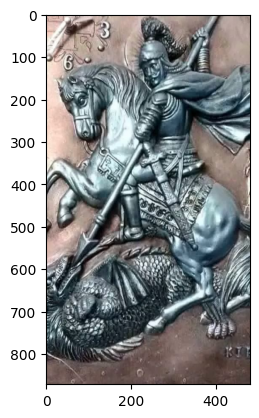

In [98]:
img_path = 'Selected/Test/george/005d75fd1ab5478b0a1b3290032e9358.jpg'
test_img = cv2.imread(img_path )
plt.imshow(test_img)

In [99]:
img = image.load_img(img_path, target_size=(256,256,3))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("St. George is present in the image.")
else:
    print("St. George is not present in the image.")

1/1 [==============================] - 0s 54ms/step
St. George is present in the image.
